<a href="https://colab.research.google.com/github/MANISH-KUMAR-CODES/Exploratory-Analysis-on-International-t20-/blob/main/Exploratory_Analysis_on_International_t20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<B>Analysis ON International t20

###Lets us first import all the necessary libraries of python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
International_T20_Data = pd.read_csv('/content/drive/MyDrive/Copy of International_T20_Data.csv')

In [ ]:
#lets check whats inside our data
International_T20_Data

In [ ]:
#top 5 rows
International_T20_Data.head(5)

In [ ]:
#last 5 rows
International_T20_Data.tail(5)

In [ ]:
#Checking info
International_T20_Data.info()

In [ ]:
#checking descriptive summary
International_T20_Data.describe().T

In [ ]:
#lets us define a function to replace column names
def replace_name(dataframe):
    dataframe.astype(str)
    dataframe_new_column=[]
    for i in dataframe.columns:
       if  'meta.' in i:
          i = i.replace('meta.','')
          dataframe_new_column.append(i)
       else: 
             'info.' in i
             i = i.replace('info.','')
             dataframe_new_column.append(i)
    return dataframe_new_column

In [ ]:
new_columns = replace_name(International_T20_Data)
new_columns

In [ ]:
International_T20_Data.columns = new_columns
International_T20_Data.head()

In [ ]:
International_T20_Data.isnull().sum()

###As we can see some columns have 1415 null values out of 1417 entries.It will be better if we drop all these columns.

In [ ]:
International_T20_Data=International_T20_Data.drop(['outcome.bowl_out','bowl_out','supersubs.South Africa','supersubs.New Zealand','outcome.eliminator','outcome.method','outcome.result'], axis = 1)

In [ ]:
#lets again check our nulls again
International_T20_Data.isnull().sum()

In [ ]:
#lets fill all the null valeues with 0
International_T20_Data=International_T20_Data.fillna(0)

In [ ]:
#lets again check our nulls again
International_T20_Data.isnull().sum()

###We also see that there are columns like dataversion ,revision and created which is of no use for our analysis , lets drops these columns from our dataframe

In [ ]:
International_T20_Data=International_T20_Data.drop(['data_version','created','revision'],axis =1)


In [ ]:
International_T20_Data.columns.unique()

##Our date column is not in correct format .we need to change that

In [ ]:
def modifying_date(dataframe):
    dates=[]
    for i in dataframe.dates:
        i = i.replace('[datetime.date(','').replace(')]','').replace(',','-').replace("['",'').replace("']",'')
        dates.append(i)
    return dates    

In [ ]:
dates = modifying_date(International_T20_Data)

In [ ]:
International_T20_Data['dates']=dates
International_T20_Data['dates'].astype(str)

In [ ]:
#checking our dataframe again
International_T20_Data.head()

##lets us fix some columns names by replacing '.' from them with '_'

In [ ]:
International_T20_Data.rename(columns = {'outcome.by.wickets':'outcome_by_wickets', 'outcome.winner':'outcome_winner','toss.decision':'toss_decision','toss.winner':'toss_winner','outcome.by.runs':'outcome_by_runs'}, inplace = True)

##Lets us check the top winning teams

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

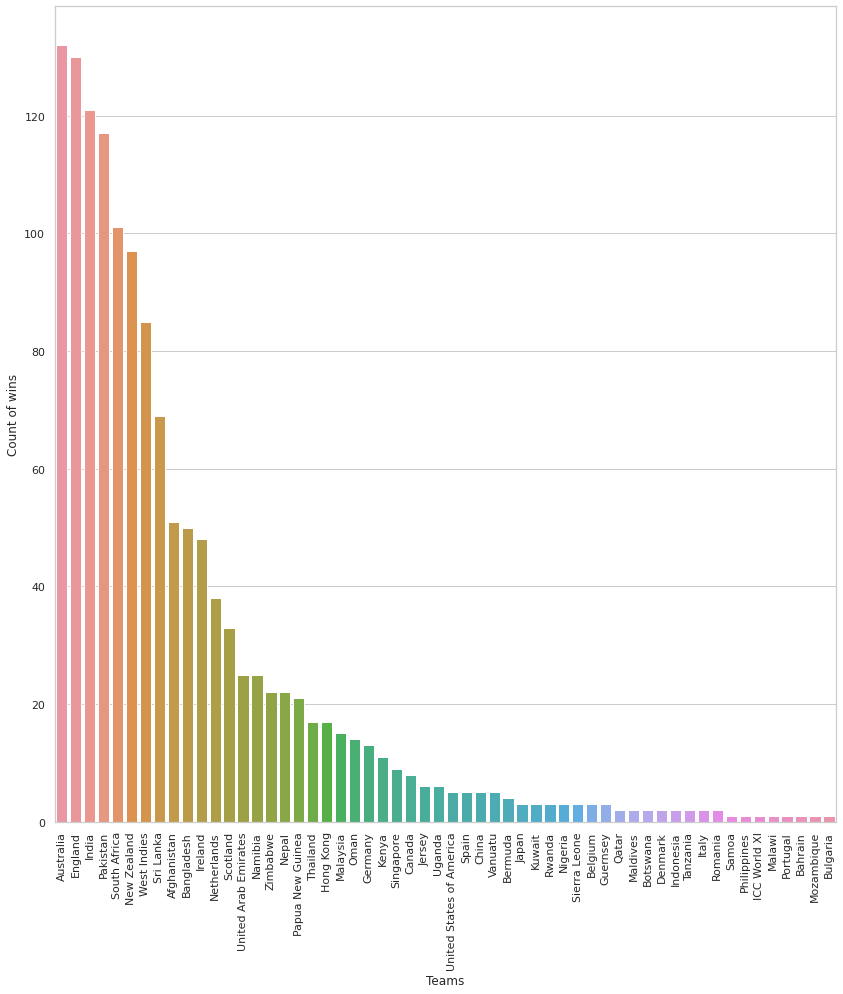

In [47]:
topwinning_teams = International_T20_Data['outcome_winner'].value_counts().drop(0,axis = 0)
plt.figure(figsize=(14,15))                              #setting figure size
plt.xlabel('Teams',size=12)                              
plt.ylabel('Count of wins',size = 12)
sns.set_theme(style="whitegrid")
#using barplot
sns.barplot(topwinning_teams.index,topwinning_teams.values)
plt.xticks(rotation = 90)